# Cross Validation of Models #

In [3]:
import joblib
import numpy as np

In [4]:
dataset_path_testing = "/Users/rakesh/Desktop/BTech_2/IML_lab/RPS/RPS_final/RPS_cobmined_V12/combined_dataset_testing.pkl" 
dataset_test, labels_test = joblib.load(dataset_path_testing)

In [9]:
X_flat = dataset_test.reshape(dataset_test.shape[0], -1)
y=labels_test

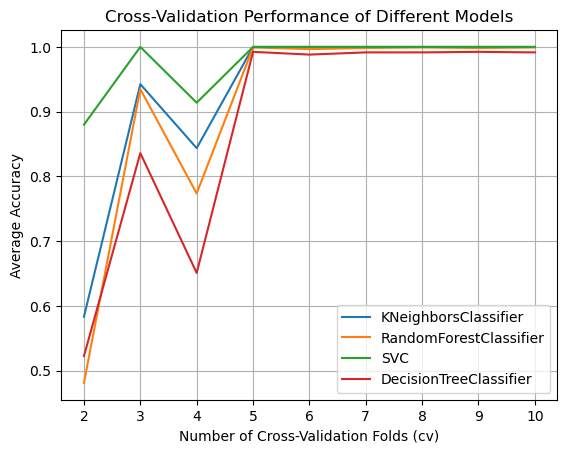

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = [
    KNeighborsClassifier(n_neighbors=1),
    RandomForestClassifier(n_estimators=16, random_state=5),
    SVC(C=0.1, kernel= 'poly'),
    DecisionTreeClassifier(max_depth=4)
]
cv_range = np.arange(2, 11)#Start from 2,as 1 is not allowed for 'cv'

for model in models:
    avg_accuracies = []
    for cv_value in cv_range:
        avg_accuracy = np.mean(cross_val_score(model, X_flat, y, cv=cv_value))
        avg_accuracies.append(avg_accuracy)
    
    plt.plot(cv_range, avg_accuracies, label=model.__class__.__name__) #plot average for each model coreepondingly to each model in model list.
#establishing the graph
plt.xlabel('Number of Cross-Validation Folds (cv)')
plt.ylabel('Average Accuracy')
plt.title('Cross-Validation Performance of Different Models')
plt.legend()
plt.grid(True)
plt.show()
